<a href="https://colab.research.google.com/github/kasev/mops/blob/master/scripts/freqs_explorations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pickle
from urllib.request import urlopen
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
from google.colab import files
# defining function for saving+downloading the latest figure

def download_figure(fig=None, filename=None):
  if (filename==None) | (".png" not in str(filename)):
    filename = "figure.png"
  if fig==None:
    plt.savefig(filename)
  else:
    fig.savefig(filename)
  files.download(filename)

In [6]:
bidecades_freqs_complete = pickle.load(urlopen("https://github.com/kasev/mops/raw/master/data/bidecades_freqs_complete.pickle"))

In [19]:

palette = sns.color_palette(None, 3)

In [26]:
bidecades_strs = ['1900-1919', '1920-1939', '1940-1959', '1960-1979', '1980-1999', '2000-2019']

def plot_bidecade_freq(terms):
    fig, ax = plt.subplots(tight_layout=True)
    if type(terms) == list:
      colors = sns.color_palette(None, len(terms))
      for term, color in zip(terms, colors):
        data = [freqs[term] if term in freqs.keys() else 0 for freqs in bidecades_freqs_complete]
        ax.plot(data, linewidth=2, color=color, label=term)
      ax.set_title(", ".join(terms), pad=-14)
    else:
      term = terms
      data = [freqs[term] if term in freqs.keys() else 0 for freqs in bidecades_freqs_complete]
      ax.plot(data, linewidth=2)
      ax.set_title(term, pad=-14)
    ax.set_xticks(range(0,6))
    ax.ticklabel_format(style="plain")
    ax.set_xticklabels(bidecades_strs, rotation=90)
    ax.set_xlabel("bidecade")
    ax.set_ylabel("freq")
    ax.legend()
    return fig

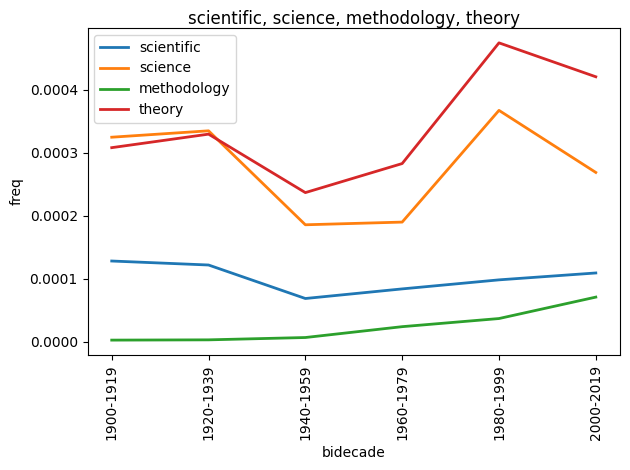

In [27]:
fig = plot_bidecade_freq(["scientific", "science", "methodology", "theory"])

In [ ]:
download_figure(fig)

# Exploring more closely the period from 2000 to 2019

In [5]:
try:
    freqs_2000 = pickle.load(open("../data/freqs_2000.pickle", "rb"))
except:
    freqs_2000 = pickle.load(urlopen("https://github.com/kasev/mops/raw/master/data/freqs_2000.pickle"))

In [6]:
halfdecades_strs = ['2000-2004', '2005-2009', '2010-2014', '2015-2019']

def plot_2000_freq(terms):
    fig, ax = plt.subplots(tight_layout=True)
    if type(terms) == list:
        colors = sns.color_palette(None, len(terms))
        for term, color in zip(terms, colors):
            data = [freqs[term] if term in freqs.keys() else 0 for freqs in freqs_2000]
            ax.plot(data, linewidth=2, color=color, label=term)
        ax.set_title(", ".join(terms), pad=-14)
    else:
        term = terms
        data = [freqs[term] if term in freqs.keys() else 0 for freqs in freqs_2000]
        ax.plot(data, linewidth=2)
        ax.set_title(term, pad=-14)
    ax.set_xticks(range(0,4))
    ax.ticklabel_format(style="plain")
    ax.set_xticklabels(halfdecades_strs, rotation=90)
    ax.set_xlabel("halfdecade")
    ax.set_ylabel("freq")
    ax.legend()
    return fig

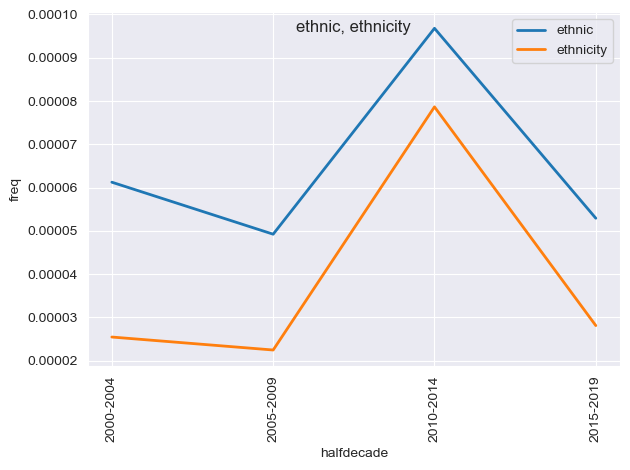

In [9]:
fig = plot_2000_freq(["ethnic", "ethnicity"])

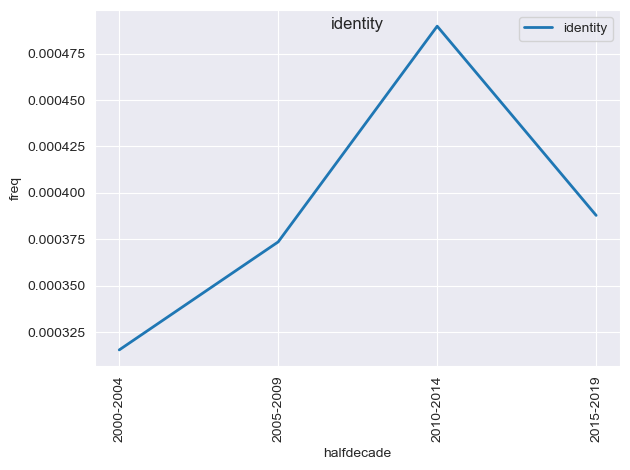

In [10]:
fig = plot_2000_freq(["identity"])
